In [1]:
import numpy as np
print(np)
%matplotlib nbagg
import matplotlib
from scipy import special
import dedalus.public as de
import numpy as np
import matplotlib.pylab as plt
from eigentools import Eigenproblem

<module 'numpy' from '/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/numpy/__init__.py'>


/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
"""
Q = 0.01269
Rm = 0.67355
Pm = 1.0e-3
beta = 25.0
Omega1 = 313.55
Omega2 = 56.43
xi = 0
R1 = 5
R2 = 15
"""
R1=1 
R2=2
Omega1 = 1.0 # nondimensionalized by inner cylinder values
Omega2 = 0.27
Pm=1.0E-6 
beta=0.0174 
xi=4.0 
Q = 2.33
Rm = 0.001521

Re = Rm/Pm
iRm = 1.0/Rm
iR = 1.0/Re

c1 = (Omega2*R2**2 - Omega1*R1**2)/(R2**2 - R1**2)
c2 = (R1**2*R2**2*(Omega1 - Omega2))/(R2**2 - R1**2)

nr1 = 50
r_shortgrid = de.Chebyshev('r', nr1, interval=(R1, R2))
d1 = de.Domain([r_shortgrid])

nr2 = nr1*1.5
r_longgrid = de.Chebyshev('r', nr2, interval=(R1, R2))
d2 = de.Domain([r_longgrid])

In [3]:
test1 = de.EVP(d1,['psi', 'u', 'A', 'B', 'psir', 'ur', 'Ar', 'Br', 'psirr', 'psirrr'],'sigma')
test1_2 = de.EVP(d2,['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')

2016-08-11 13:48:27,565 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2016-08-11 13:48:27,566 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [4]:
# let's just test L0
test1.parameters['iRm'] = 0.5
test1.parameters['iR'] = 0.3
test1.add_equation("r**4*sigma*psi - iR*(-3*psir + r*3*psirr - 2*r**2*psirrr + r**3*dr(psirrr)) = 0")
test1.add_equation("r**2*sigma*u - iR*(r**2*dr(ur) + r*ur - u) = 0")
test1.add_equation("r*sigma*A - iRm*(r*dr(Ar) - Ar) = 0")
test1.add_equation("r**2*sigma*B - iRm*(r**2*dr(Br) + r*Br - B) = 0")
test1.add_equation("dr(psi) - psir = 0")
test1.add_equation("dr(psir) - psirr = 0")
test1.add_equation("dr(psirr) - psirrr = 0")
test1.add_equation("dr(u) - ur = 0")
test1.add_equation("dr(A) - Ar = 0")
test1.add_equation("dr(B) - Br = 0")

test1.add_bc('left(u) = 0')
test1.add_bc('right(u) = 0')
test1.add_bc('left(psi) = 0')
test1.add_bc('right(psi) = 0')
test1.add_bc('left(psi + r*psir) = 0')
test1.add_bc('right(psi + r*psir) = 0')
test1.add_bc('left(A) = 0')
test1.add_bc('right(A) = 0')
test1.add_bc('left(B + r*Br) = 0')
test1.add_bc('right(B + r*Br) = 0')

In [5]:
test_solver1 = test1.build_solver()
test_solver1.solve(test_solver1.pencils[0])


/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: invalid value encountered in true_divide
  w = alpha / beta


In [6]:
ev1 = test_solver1.eigenvalues

In [7]:

#plt.plot(ev1.real, ev1.imag, '+')

In [8]:
#ev1

In [9]:
# L0 adjoint...
test1adj = de.EVP(d1,['psi', 'u', 'A', 'B', 'psir', 'ur', 'Ar', 'Br', 'psirr', 'psirrr'],'sigma')
test1adj.parameters['iRm'] = 0.5
test1adj.parameters['iR'] = 0.3
test1adj.add_equation("r**4*sigma*psi - iR*(-3*psir - r*9*psirr + 6*r**2*psirrr - r**3*dr(psirrr)) = 0")
test1adj.add_equation("r*sigma*u - iR*(r*dr(ur) - ur) = 0")
test1adj.add_equation("r**2*sigma*A - iRm*(r**2*dr(Ar) + r*Ar - A) = 0")
test1adj.add_equation("r*sigma*B - iRm*(r*dr(Br) - Br) = 0")
test1adj.add_equation("dr(psi) - psir = 0")
test1adj.add_equation("dr(psir) - psirr = 0")
test1adj.add_equation("dr(psirr) - psirrr = 0")
test1adj.add_equation("dr(u) - ur = 0")
test1adj.add_equation("dr(A) - Ar = 0")
test1adj.add_equation("dr(B) - Br = 0")

test1adj.add_bc('left(u) = 0')
test1adj.add_bc('right(u) = 0')
test1adj.add_bc('left(psi) = 0')
test1adj.add_bc('right(psi) = 0')
test1adj.add_bc('left(psi + r*psir) = 0')
test1adj.add_bc('right(psi + r*psir) = 0')
test1adj.add_bc('left(A) = 0')
test1adj.add_bc('right(A) = 0')
test1adj.add_bc('left(B + r*Br) = 0')
test1adj.add_bc('right(B + r*Br) = 0')

2016-08-11 13:48:30,969 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [10]:
testadj_solver1 = test1adj.build_solver()
testadj_solver1.solve(testadj_solver1.pencils[0])

ev1adj = testadj_solver1.eigenvalues

/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: invalid value encountered in true_divide
  w = alpha / beta


<IPython.core.display.Javascript object>


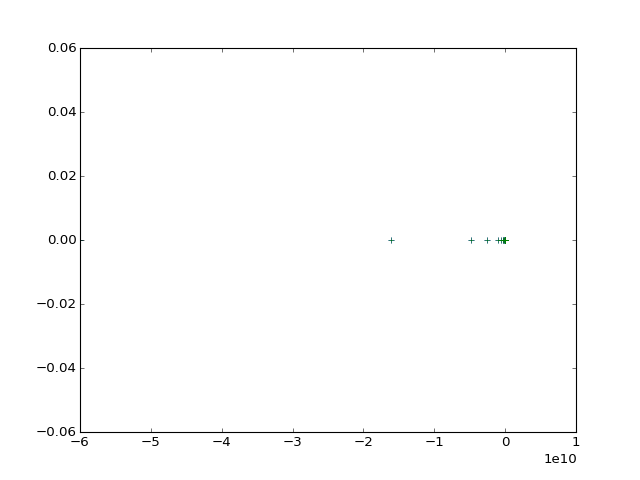

In [21]:
fig = plt.figure()
plt.plot(ev1adj.real, ev1adj.imag, '+')
plt.plot(-ev1.real, -ev1.imag, '+')

In [47]:
lv1 = de.EVP(d1,
         ['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')

lv1.parameters['Q'] = Q
lv1.parameters['iR'] = iR
lv1.parameters['iRm'] = iRm
lv1.parameters['xi'] = xi
lv1.parameters['beta'] = beta
lv1.parameters['c1'] = c1
lv1.parameters['c2'] = c2
lv1.parameters['B0'] = 1
lv1.parameters['dz'] = 1j*Q

lv1.parameters['bessel1'] = special.iv(0, Q*R1)/special.iv(1, Q*R1)
lv1.parameters['bessel2'] = special.kn(0, Q*R2)/special.kn(1, Q*R2)

lv1.substitutions['ru0'] = '(r*r*c1 + c2)' # u0 = r Omega(r) = Ar + B/r
lv1.substitutions['rrdu0'] = '(c1*r*r-c2)' # du0/dr = A - B/r^2
lv1.substitutions['twooverbeta'] = '(2.0/beta)'

lv1.substitutions['psivisc'] = '(2*r**2*Q**2*psir - 2*r**3*Q**2*psirr + r**3*Q**4*psi + r**3*dr(psirrr) - 3*psir + 3*r*psirr - 2*r**2*psirrr)'
lv1.substitutions['uvisc'] = '(-r**3*Q**2*u + r**3*dr(ur) + r**2*ur - r*u)'
lv1.substitutions['Avisc'] = '(r*dr(Ar) - r*Q**2*A - Ar)' 
lv1.substitutions['Bvisc'] = '(-r**3*Q**2*B + r**3*dr(Br) + r**2*Br - r*B)'

lv1.add_equation("sigma*(-r**3*Q**2*psi + r**3*psirr - r**2*psir) - r**2*2*ru0*1j*Q*u + r**3*twooverbeta*B0*1j*Q**3*A + twooverbeta*B0*r**2*1j*Q*Ar - twooverbeta*r**3*B0*1j*Q*dr(Ar) - iR*psivisc + twooverbeta*r**2*2*xi*1j*Q*B = 0") #corrected on whiteboard 5/6
lv1.add_equation("sigma*r**3*u + 1j*Q*ru0*psi + 1j*Q*rrdu0*psi - 1j*Q*r**3*twooverbeta*B0*B - iR*uvisc = 0") 
lv1.add_equation("sigma*r*A - r*B0*1j*Q*psi - iRm*Avisc = 0")
lv1.add_equation("sigma*r**3*B + ru0*1j*Q*A - r**3*B0*1j*Q*u - 1j*Q*rrdu0*A - iRm*Bvisc - 2*xi*1j*Q*psi = 0") 

lv1.add_equation("dr(psi) - psir = 0")
lv1.add_equation("dr(psir) - psirr = 0")
lv1.add_equation("dr(psirr) - psirrr = 0")
lv1.add_equation("dr(u) - ur = 0")
lv1.add_equation("dr(A) - Ar = 0")
lv1.add_equation("dr(B) - Br = 0")

lv1.add_bc('left(u) = 0')
lv1.add_bc('right(u) = 0')
lv1.add_bc('left(psi) = 0')
lv1.add_bc('right(psi) = 0')
lv1.add_bc('left(psir) = 0')
lv1.add_bc('right(psir) = 0')
#lv1.add_bc('left(A) = 0')
#lv1.add_bc('right(A) = 0')
#lv1.add_bc('left(B + r*Br) = 0')
#lv1.add_bc('right(B + r*Br) = 0')
# try w/ insulating bcs
lv1.add_bc('left(dr(r*A) - Q*r*bessel1*A) = 0')
lv1.add_bc('right(dr(r*A) + Q*r*bessel2*A) = 0') # dz is just a constant so divide it out! (problematic for V20)
lv1.add_bc('left(B) = 0')
lv1.add_bc('right(B) = 0')

2016-08-11 14:10:35,692 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


In [48]:
#ordere = lv1.build_solver()
#ordere.solve(ordere.pencils[0])

#evals_ordere = ordere.eigenvalues
EPordere = Eigenproblem(lv1)
EPordere.solve()
EPordere.reject_spurious()
evals_ordere = EPordere.evalues_good


2016-08-11 14:10:41,258 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/Users/susanclark/eigentools/eigentools/eigenproblem.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  indx = lambda1_and_indx[:, 1].astype(np.int)


In [49]:
#fig = plt.figure()
#plt.plot(ev1.real, ev1adj.real, '.')

The following is the old adjoint, currently in allorders2_widegap

In [36]:
adjold = de.EVP(d1,
         ['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')

adjold.parameters['Q'] = Q
adjold.parameters['iR'] = iR
adjold.parameters['iRm'] = iRm
adjold.parameters['xi'] = xi
adjold.parameters['beta'] = beta
adjold.parameters['c1'] = c1
adjold.parameters['c2'] = c2
adjold.parameters['B0'] = 1
adjold.parameters['dz'] = 1j*Q

adjold.substitutions['ru0'] = '(r*r*c1 + c2)' # u0 = r Omega(r) = Ar + B/r
adjold.substitutions['rrdu0'] = '(c1*r*r-c2)' # du0/dr = A - B/r^2
adjold.substitutions['twooverbeta'] = '(2.0/beta)'

# multiply by [r^4, r^2, r^3, r^2]
adjold.add_equation("sigma*(-r**3*Q**2*psi + r**3*psirr - r**2*psir) - r*1j*Q*rrdu0*u - r*ru0*1j*Q*u + r**4*1j*Q*A - iR*r**3*Q**4*psi + iR*r**3*2*Q**2*psirr - iR*r**2*2*Q**2*psir - iR*r**3*dr(psirrr) + iR*r**2*2*psirrr - iR*r*3*psirr + iR*3*psir + r*2*1j*Q*B0*xi*B = 0")
adjold.add_equation("sigma*r**2*u + 1j*Q*r**2*B + 2*1j*Q*ru0*psi + iR*Q**2*r**2*u - iR*r**2*dr(ur) -iR*r*ur + iR*u = 0")
adjold.add_equation("sigma*r**3*A + rrdu0*1j*Q*B - ru0*1j*Q*B - twooverbeta*r**2*1j*Q**3*psi + twooverbeta*r**2*1j*Q*psirr - twooverbeta*r*1j*Q*psir + iRm*r**3*Q**2*A - iRm*r**3*dr(Ar) + iRm*r**2*Ar = 0")
adjold.add_equation("sigma*r**2*B + r**2*twooverbeta*1j*Q*u + r**2*iRm*Q**2*B - r**2*iRm*dr(Br) - iRm*r*Br + iRm*B - twooverbeta*2*1j*Q*B0*xi*psi = 0") 

adjold.add_equation("dr(psi) - psir = 0")
adjold.add_equation("dr(psir) - psirr = 0")
adjold.add_equation("dr(psirr) - psirrr = 0")
adjold.add_equation("dr(u) - ur = 0")
adjold.add_equation("dr(A) - Ar = 0")
adjold.add_equation("dr(B) - Br = 0")

adjold.add_bc('left(u) = 0')
adjold.add_bc('right(u) = 0')
adjold.add_bc('left(psi) = 0')
adjold.add_bc('right(psi) = 0')
adjold.add_bc('left(psir) = 0')
adjold.add_bc('right(psir) = 0')
adjold.add_bc('left(A) = 0')
adjold.add_bc('right(A) = 0')
adjold.add_bc('left(B) = 0')
adjold.add_bc('right(B) = 0')
#adjold.add_bc('left(B + r*Br) = 0')
#adjold.add_bc('right(B + r*Br) = 0') # axial component of current = 0

EPadjold = Eigenproblem(adjold)

#adjprob = adjold.build_solver()
#adjprob.solve(adjprob.pencils[0])

#evals_oldadj = adjprob.eigenvalues

EPadjold.solve()
EPadjold.reject_spurious()
evals_oldadj = EPadjold.evalues_good

2016-08-11 14:00:13,485 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2016-08-11 14:00:18,069 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/Users/susanclark/eigentools/eigentools/eigenproblem.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  indx = lambda1_and_indx[:, 1].astype(np.int)


<IPython.core.display.Javascript object>


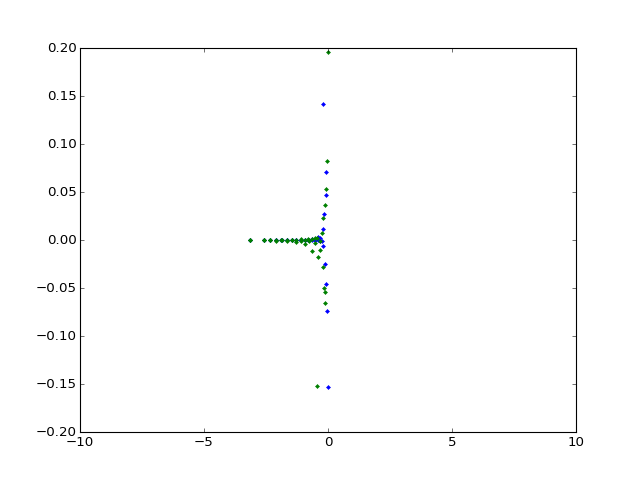

(-10, 10)

In [50]:
plt.figure()
plt.plot(evals_oldadj.real, evals_oldadj.imag, '.')
plt.plot(evals_ordere.real, evals_ordere.imag, '.')
plt.xlim(-10, 10)

In [38]:
#plt.figure()
#print(len(evals_oldadj), len(evals_ordere))
#plt.plot(evals_oldadj[:-1].real, evals_ordere.real, '.')
#plt.plot(evals_oldadj[:-1].imag, evals_ordere.imag, '.')
#plt.xlim(-10, 10)
#plt.ylim(-10, 10)

Number of positive real parts 0


<IPython.core.display.Javascript object>


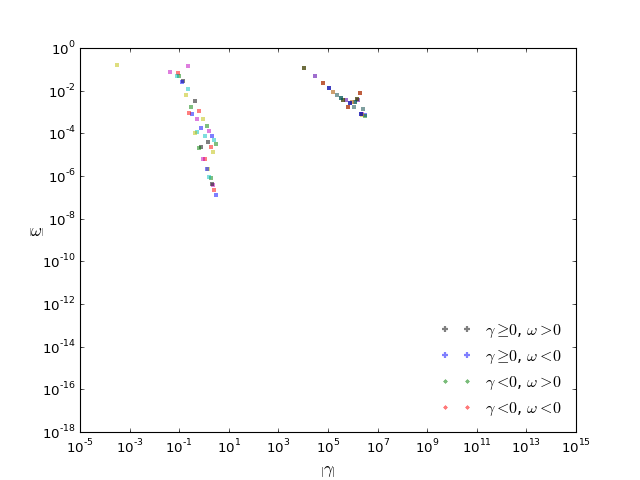

In [39]:
EPadjold.spectrum(spectype="good")

Number of positive real parts 1


<IPython.core.display.Javascript object>


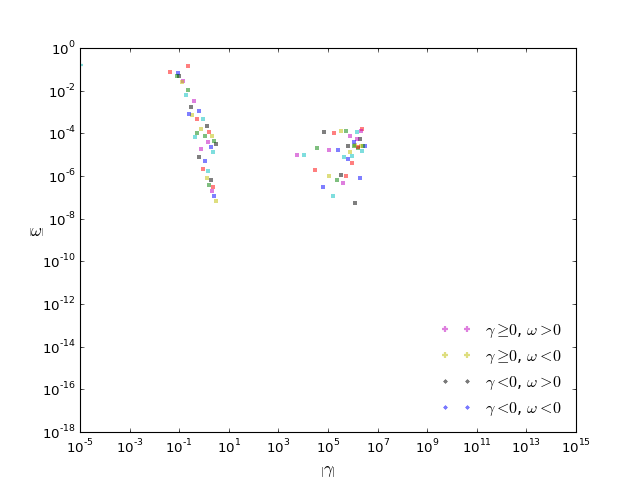

In [26]:
EPordere.spectrum(spectype = "good")

In [40]:
adjnew = de.EVP(d1,
         ['psi','u', 'A', 'B', 'psir', 'psirr', 'psirrr', 'ur', 'Ar', 'Br'],'sigma')

adjnew.parameters['Q'] = Q
adjnew.parameters['iR'] = iR
adjnew.parameters['iRm'] = iRm
adjnew.parameters['xi'] = xi
adjnew.parameters['beta'] = beta
adjnew.parameters['c1'] = c1
adjnew.parameters['c2'] = c2
adjnew.parameters['B0'] = 1
adjnew.parameters['dz'] = 1j*Q

adjnew.substitutions['ru0'] = '(r*r*c1 + c2)' # u0 = r Omega(r) = Ar + B/r
adjnew.substitutions['rrdu0'] = '(c1*r*r-c2)' # du0/dr = A - B/r^2
adjnew.substitutions['twooverbeta'] = '(2.0/beta)'

# multiply by [r^4, r^2, r^3, r^2]
adjnew.add_equation("sigma*(-r**3*Q**2*psi + r**3*psirr - r**2*psir) - Q**4*r**3*iR*psi + iR*2*Q**2*r**3*psirr - iR*2*Q**2*r**2*psir + 8*r*iR*Q**2*psi - 1j*Q*r*rrdu0*u + 1j*Q*r**4*A - 1j*Q*r*ru0*u + xi*2*1j*Q*r*B + iR*r**3*dr(psirrr) - iR*6*r**2*psirrr + iR*9*r*psirr + iR*3*psir = 0")
adjnew.add_equation("sigma*r**2*u + Q**2*r**2*iR*u + 1j*Q*r**2*B + 2*1j*Q*ru0*psi - iR*r**2*dr(ur) + iR*r*ur = 0")
adjnew.add_equation("sigma*r**3*A - (2/beta)*1j*Q**3*r**2*psi + iRm*Q**2*r**3*A + 1j*Q*rrdu0*B - 1j*Q*ru0*B + (2/beta)*1j*Q*r**2*psirr - (2/beta)*1j*Q*r*psir - iRm*r**3*dr(Ar) - iRm*r**2*Ar + iRm*r*A = 0")
adjnew.add_equation("sigma*r**2*B + iRm*Q**2*r**2*B + (2/beta)*1j*Q*r**2*u - xi*(2/beta)*2*1j*Q*psi - iRm*r**2*dr(Br) + iRm*r*Br = 0") 

adjnew.add_equation("dr(psi) - psir = 0")
adjnew.add_equation("dr(psir) - psirr = 0")
adjnew.add_equation("dr(psirr) - psirrr = 0")
adjnew.add_equation("dr(u) - ur = 0")
adjnew.add_equation("dr(A) - Ar = 0")
adjnew.add_equation("dr(B) - Br = 0")

adjnew.add_bc('left(u) = 0')
adjnew.add_bc('right(u) = 0')
adjnew.add_bc('left(psi) = 0')
adjnew.add_bc('right(psi) = 0')
adjnew.add_bc('left(psir) = 0')
adjnew.add_bc('right(psir) = 0')
adjnew.add_bc('left(A) = 0')
adjnew.add_bc('right(A) = 0')
adjnew.add_bc('left(B) = 0')
adjnew.add_bc('right(B) = 0')
#adjnew.add_bc('left(Br) = 0')
#adjnew.add_bc('right(Br) = 0')
#adjnew.add_bc('left(B + r*Br) = 0')
#adjnew.add_bc('right(B + r*Br) = 0') # axial component of current = 0

EPadjnew = Eigenproblem(adjnew)

#adjprob = adjold.build_solver()
#adjprob.solve(adjprob.pencils[0])

#evals_oldadj = adjprob.eigenvalues

EPadjnew.solve()
EPadjnew.reject_spurious()
evals_newadj = EPadjnew.evalues_good

2016-08-11 14:01:11,274 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10
2016-08-11 14:01:15,867 problems 0/1 INFO :: Solving EVP with homogeneity tolerance of 1.000e-10


/Users/susanclark/dedalus_upgraded2/dedalus/lib/python3.5/site-packages/scipy/linalg/decomp.py:56: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta
/Users/susanclark/eigentools/eigentools/eigenproblem.py:183: ComplexWarning: Casting complex values to real discards the imaginary part
  indx = lambda1_and_indx[:, 1].astype(np.int)


Number of positive real parts 20


<IPython.core.display.Javascript object>


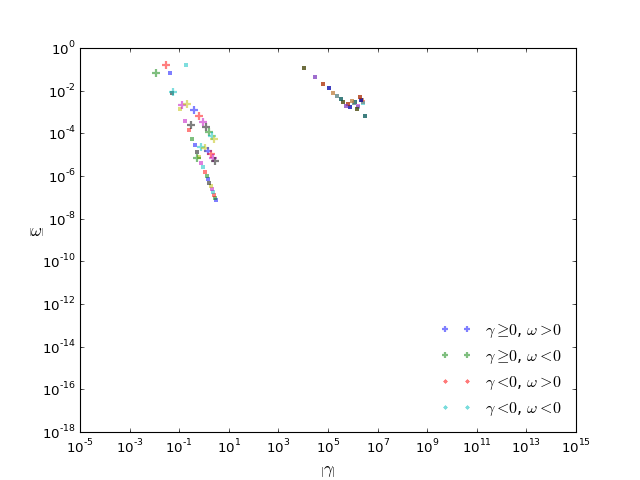

In [41]:
EPadjnew.spectrum(spectype = "good")

In [42]:
print(len(evals_newadj))
print(len(evals_oldadj))
print(len(evals_ordere))

84
83
81


<IPython.core.display.Javascript object>


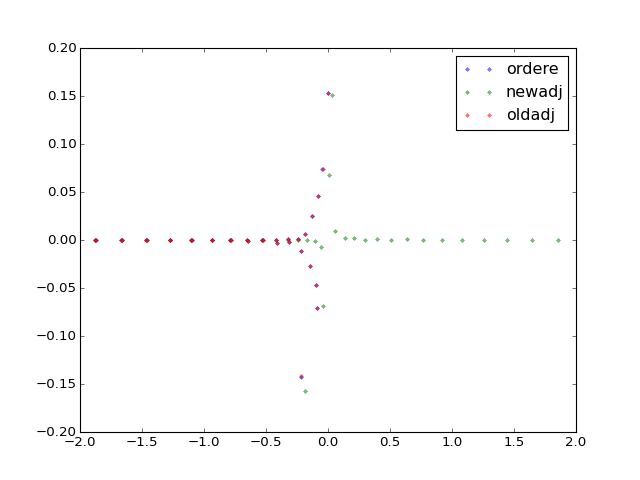

In [43]:
plt.figure()
plt.plot(evals_ordere.real, evals_ordere.imag, '.', alpha=0.5, label='ordere')
plt.plot(evals_newadj.real, -evals_newadj.imag, '.', alpha=0.5, label='newadj')
plt.plot(evals_oldadj.real, -evals_oldadj.imag, '.', alpha=0.5, label='oldadj')
plt.xlim(-2, 2)
plt.legend()

In [51]:
ordere_gr_rate = np.max(evals_ordere.real)
ordere_freq = evals_ordere[evals_ordere.real == ordere_gr_rate].imag
print(ordere_gr_rate, ordere_freq)

0.0101827668551 [ 0.19548092]


In [52]:
oldadj_gr_rate = np.max(evals_oldadj.real)
oldadj_freq = evals_oldadj[evals_oldadj.real == oldadj_gr_rate].imag
print(oldadj_gr_rate, oldadj_freq)

-0.000317061311399 [-0.15312384]


In [53]:
newadj_gr_rate = np.max(evals_newadj.real)
newadj_freq = evals_newadj[evals_newadj.real == newadj_gr_rate].imag
print(newadj_gr_rate, newadj_freq)

2.845271265 [  5.14732482e-06]
